<p style = "font-size: 25px">Quantum key distribution (QKD) is a secure communication method for exchanging encryption keys only known between shared parties.</p>

<b style = "font-size: 25px">Sarah:</b><br><br>
-get 10 random bits and save them<br>
-get 10 random filters

[1, 0, 1, 1, 1, 1, 0, 0, 1, 1]


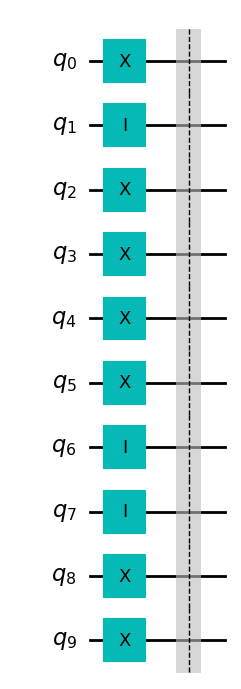

In [135]:
from qiskit import QuantumCircuit, execute, Aer
import random
number_of_bits = 10

#Getting the 10 random bits and filters
rand_bits = [random.randint(0,1) for i in range(number_of_bits)]
print(rand_bits)

#Applying the bits to the circuit
qc = QuantumCircuit(number_of_bits)
for i in range(number_of_bits):
    if(rand_bits[i]==1):
        qc.x(i)
    else:
        qc.i(i)
qc.barrier()
qc.draw('mpl')


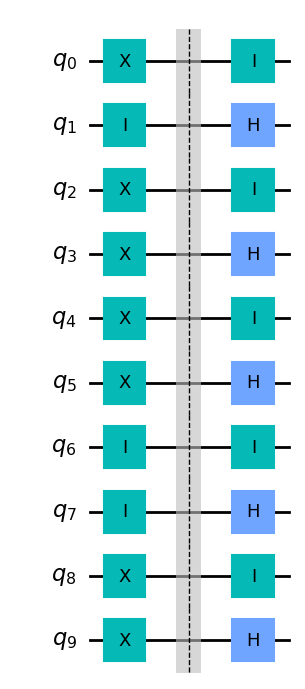

In [136]:
#Getting and Applying the filters to the circuit
S_rand_filters = [random.choice(['Z','X']) for i in range(number_of_bits)]
for i in range(number_of_bits):
    if(S_rand_filters[i]=='Z'):
        qc.i(i)
    else:
        qc.h(i)
qc.draw('mpl')

<b style = "font-size: 25px">Khaled:</b><br><br>
-get 10 random filters<br>
-measure the qubits after applying filters<br>
-communicate with sarah to find the common filters between them

['X', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z', 'X', 'Z']
Sarah Key is 
[1, 1]
Khaled key is
[1, 1]


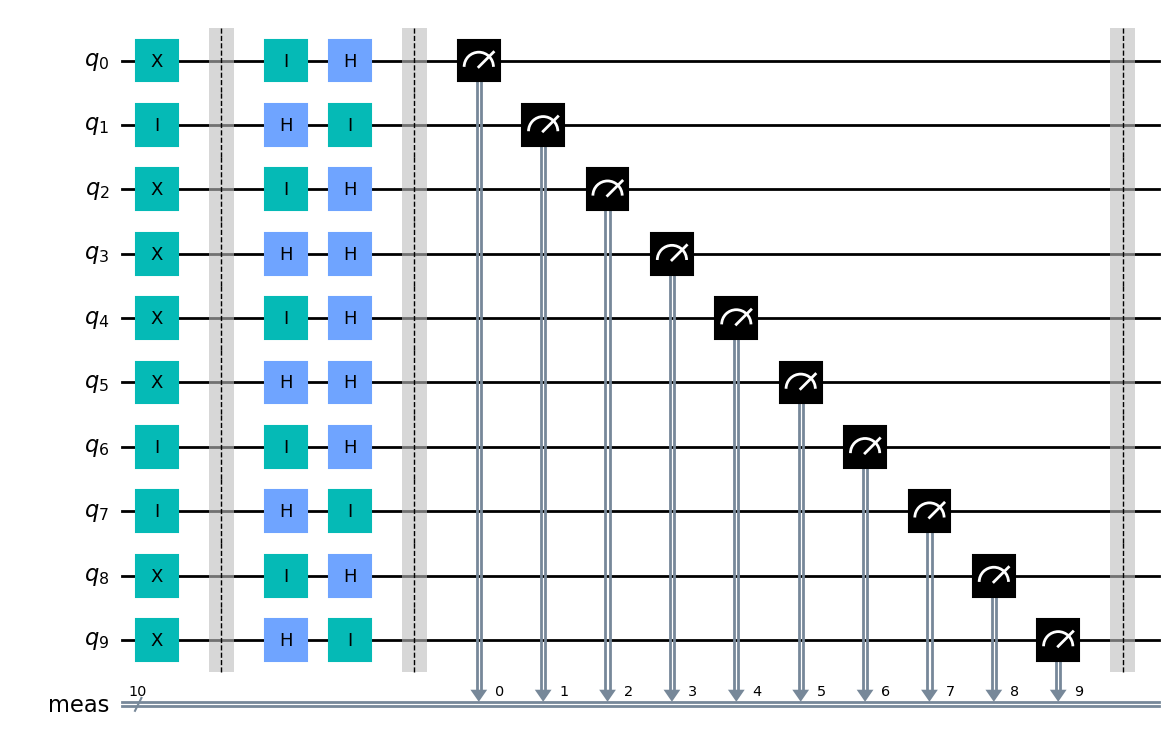

In [137]:
K_rand_filters = [random.choice(['Z','X']) for i in range(number_of_bits)]
print(K_rand_filters)

for i in range(number_of_bits):
    if(K_rand_filters[i]=='Z'):
        qc.i(i)
    else:
        qc.h(i)
qc.measure_all()
qc.barrier()

output = list(execute(qc,Aer.get_backend('qasm_simulator'), shots=1).result().get_counts())[0]
output = output[::-1] #Reversing output

listofindex = []
for i in range(number_of_bits):
    if(S_rand_filters[i]==K_rand_filters[i]):
        listofindex.append(i)

S_key = [rand_bits[i] for i in listofindex]
K_key = [int(output[i]) for i in listofindex]
print("Sarah Key is ")
print(S_key)
print("Khaled key is")
print(K_key)

qc.draw('mpl')

<h2> Now let's Build the circuit with EVE</h2>
<p style = 'font-size: 25px'>Case 1: Without measurements</p>

[1, 0, 1, 0, 1, 1, 0, 0, 1, 1]


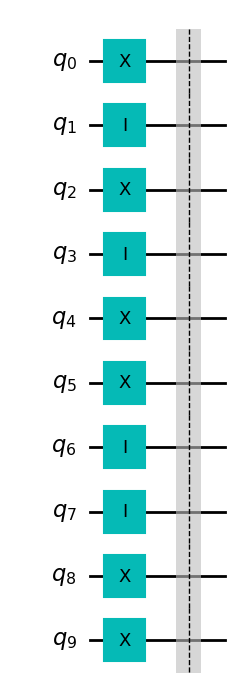

In [138]:
#Getting the 10 random bits and filters
rand_bits = [random.randint(0,1) for i in range(number_of_bits)]
print(rand_bits)

#Applying the bits to the circuit
qc = QuantumCircuit(number_of_bits)
for i in range(number_of_bits):
    if(rand_bits[i]==1):
        qc.x(i)
    else:
        qc.i(i)
qc.barrier()
qc.draw('mpl')

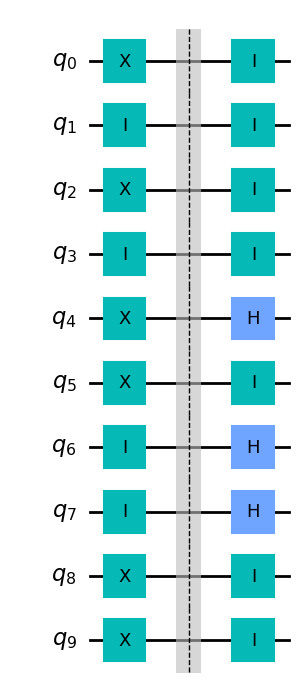

In [139]:
#Applying the filters to the circuit
S_rand_filters = [random.choice(['Z','X']) for i in range(number_of_bits)]
for i in range(number_of_bits):
    if(S_rand_filters[i]=='Z'):
        qc.i(i)
    else:
        qc.h(i)
qc.draw('mpl')

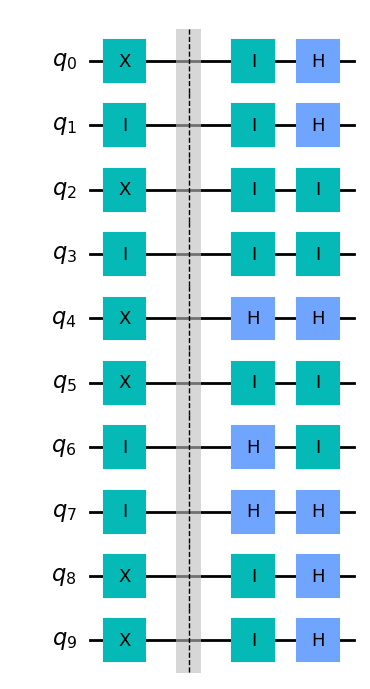

In [140]:
E_rand_filters = [random.choice(['Z','X']) for i in range(number_of_bits)]
for i in range(number_of_bits):
    if(E_rand_filters[i]=='Z'):
        qc.i(i)
    else:
        qc.h(i)

qc.draw('mpl')

['X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'Z']
Sarah Key is 
[0, 0, 0, 1, 1]
Khaled key is
[0, 0, 0, 1, 1]


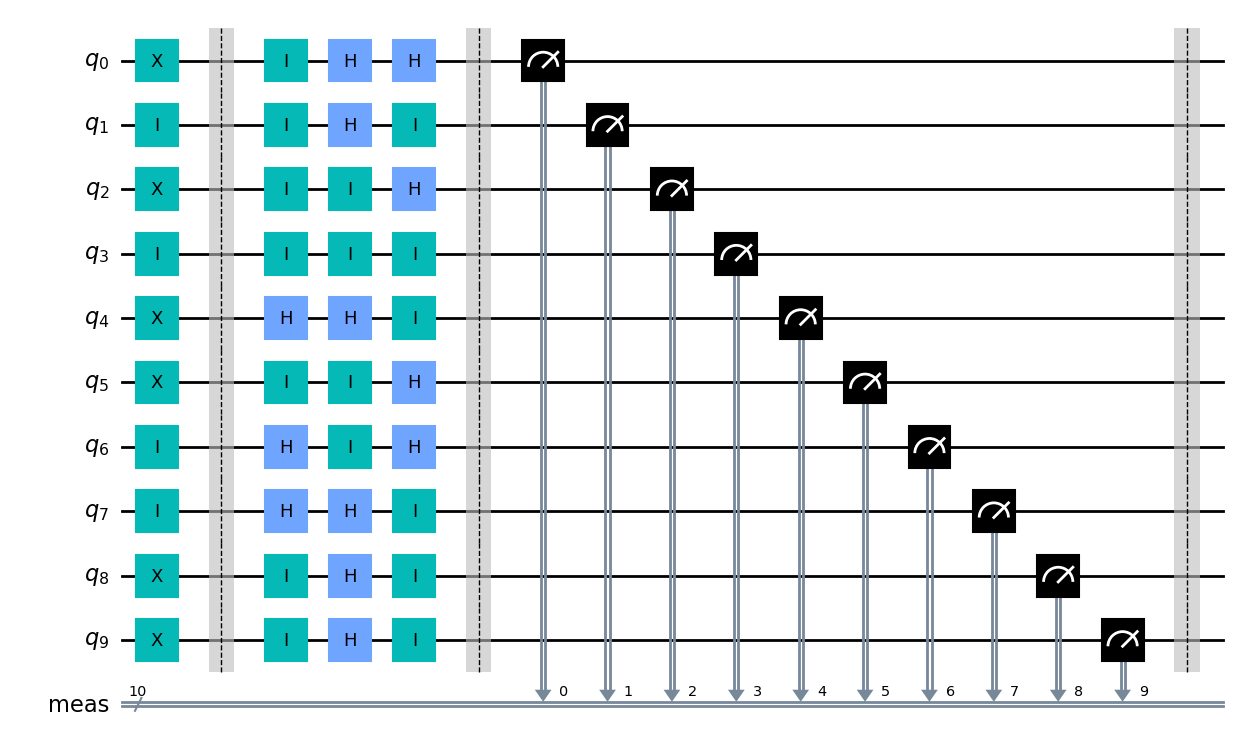

In [141]:
K_rand_filters = [random.choice(['Z','X']) for i in range(number_of_bits)]
print(K_rand_filters)

for i in range(number_of_bits):
    if(K_rand_filters[i]=='Z'):
        qc.i(i)
    else:
        qc.h(i)
qc.measure_all()
qc.barrier()

output = list(execute(qc,Aer.get_backend('qasm_simulator'), shots=1).result().get_counts())[0]
output = output[::-1] #Reversing output

listofindex = []
for i in range(number_of_bits):
    if(S_rand_filters[i]==K_rand_filters[i]):
        listofindex.append(i)

S_key = [rand_bits[i] for i in listofindex]
K_key = [int(output[i]) for i in listofindex]
print("Sarah Key is ")
print(S_key)
print("Khaled key is")
print(K_key)


qc.draw('mpl')


<p style = 'font-size: 25px'>Case 2: With measurements</p>

[1, 1, 1, 1, 1, 1, 0, 1, 0, 1]


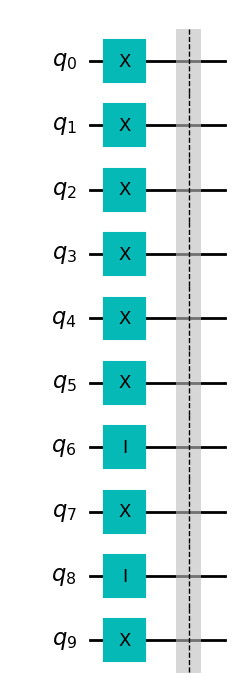

In [142]:
#Getting the 10 random bits and filters
rand_bits = [random.randint(0,1) for i in range(number_of_bits)]
print(rand_bits)

#Applying the bits to the circuit
qc = QuantumCircuit(number_of_bits)
for i in range(number_of_bits):
    if(rand_bits[i]==1):
        qc.x(i)
    else:
        qc.i(i)
qc.barrier()
qc.draw('mpl')

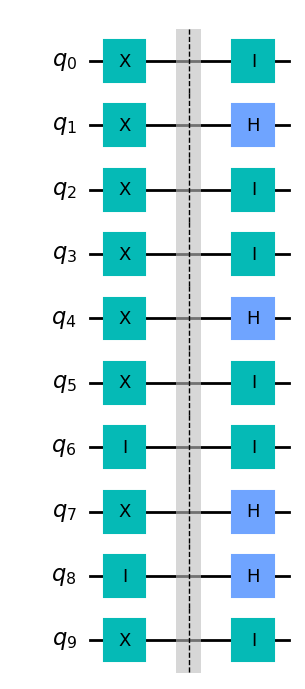

In [143]:
#Applying the filters to the circuit
S_rand_filters = [random.choice(['Z','X']) for i in range(number_of_bits)]
for i in range(number_of_bits):
    if(S_rand_filters[i]=='Z'):
        qc.i(i)
    else:
        qc.h(i)
qc.draw('mpl')

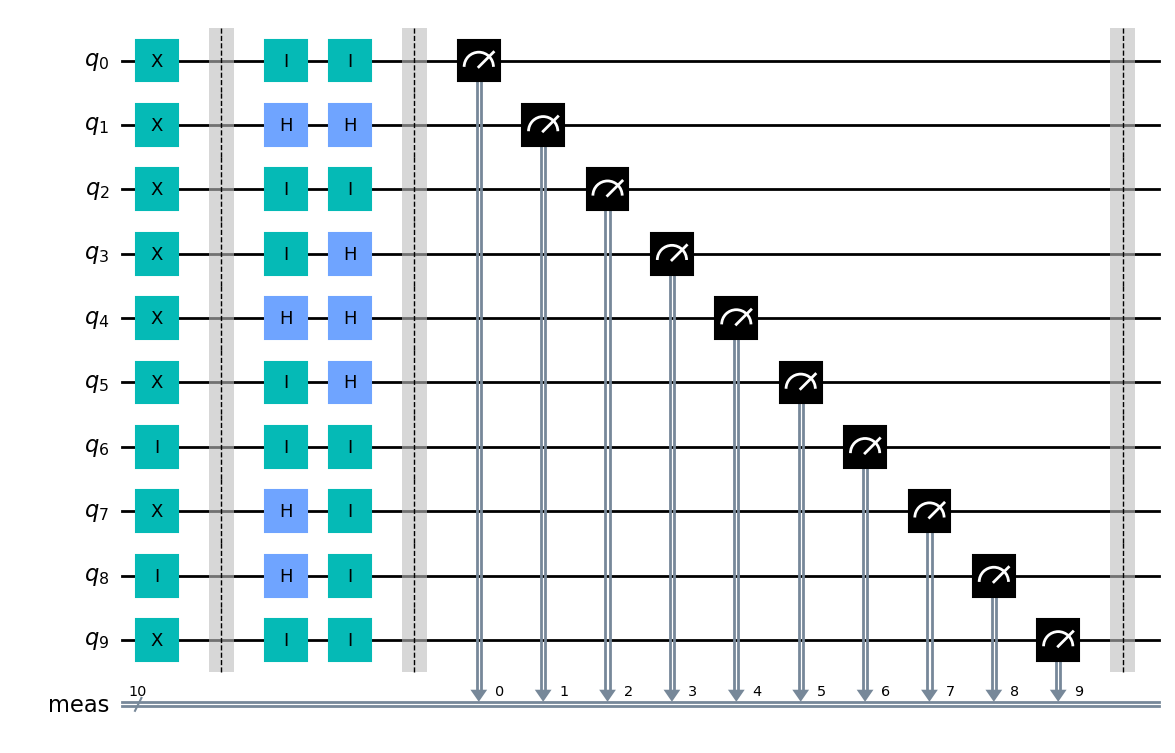

In [144]:
E_rand_filters = [random.choice(['Z','X']) for i in range(number_of_bits)]
for i in range(number_of_bits):
    if(E_rand_filters[i]=='Z'):
        qc.i(i)
    else:
        qc.h(i)
qc.measure_all()
qc.barrier()
qc.draw('mpl')

['X', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'X', 'X']
1111100011 0111000111
Sarah Key is 
[1, 1, 1, 1, 0, 1, 0]
Khaled key is
[1, 1, 1, 0, 0, 0, 1]
Eve Key is 
[1, 1, 0, 0, 1, 1, 1]


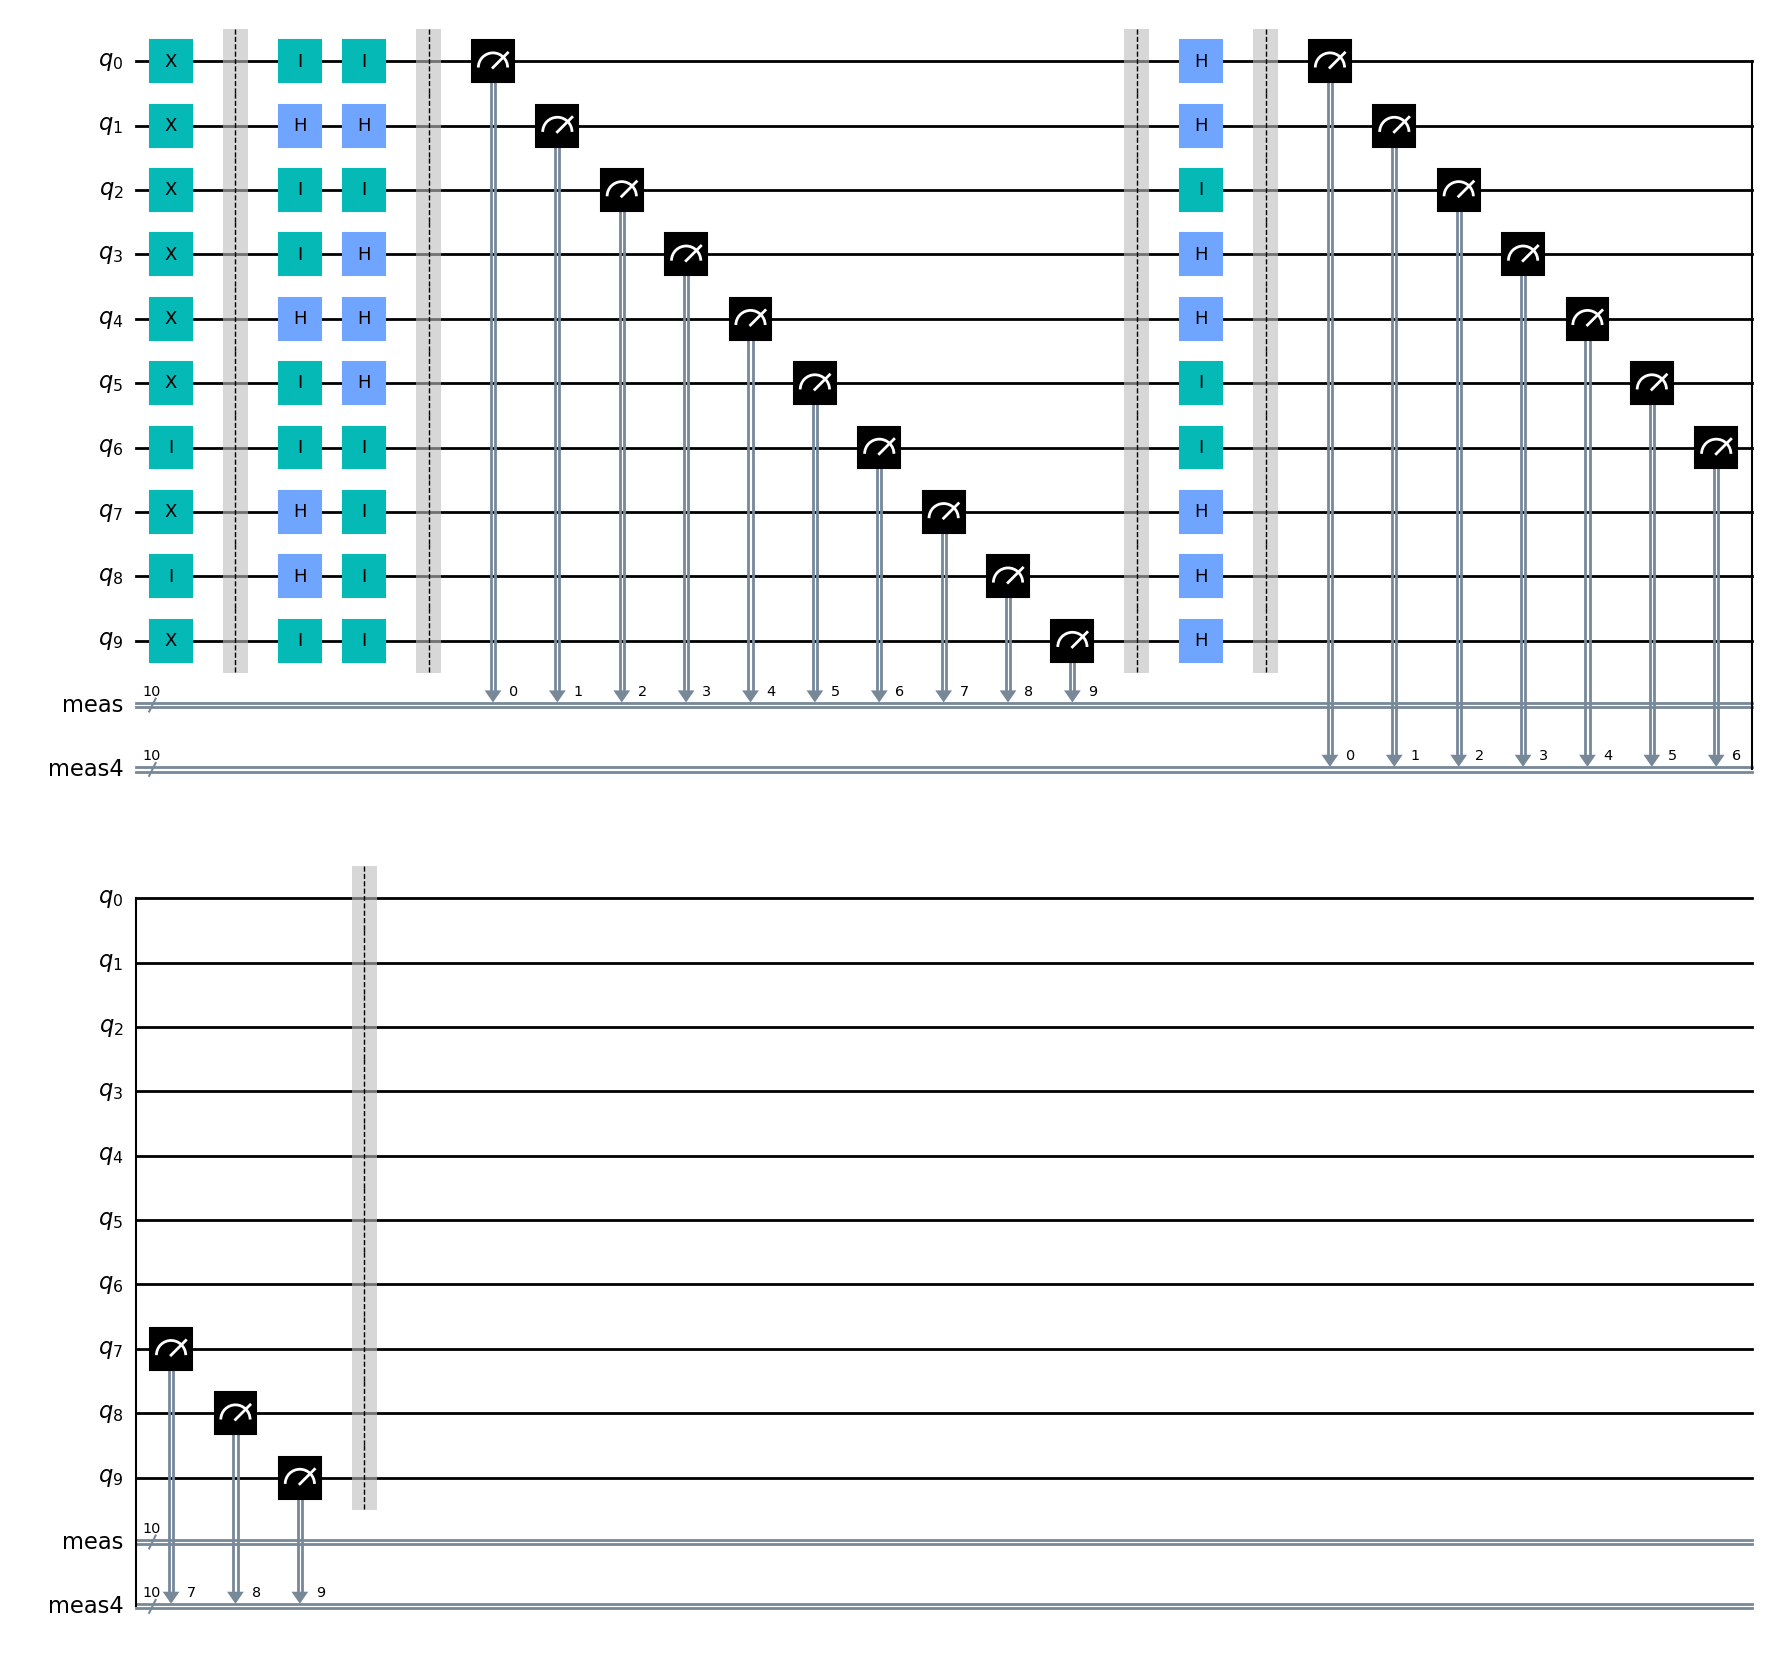

In [145]:
K_rand_filters = [random.choice(['Z','X']) for i in range(number_of_bits)]
print(K_rand_filters)

for i in range(number_of_bits):
    if(K_rand_filters[i]=='Z'):
        qc.i(i)
    else:
        qc.h(i)
qc.measure_all()
qc.barrier()

output = list(execute(qc,Aer.get_backend('qasm_simulator'), shots=1).result().get_counts())[0]
output = output[::-1] #Reversing output
print(output)
listofindex = []
for i in range(number_of_bits):
    if(S_rand_filters[i]==K_rand_filters[i]):
        listofindex.append(i)

S_key = [rand_bits[i] for i in listofindex]
K_key = [int(output[i]) for i in listofindex]
E_key = [int(output[(20-i)]) for i in listofindex]
print("Sarah Key is ")
print(S_key)
print("Khaled key is")
print(K_key)
print("Eve Key is ")
print(E_key)
qc.draw('mpl')